In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6746ba6b3c16e77145d6ee5dc11b8c1a


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | ibiruba
Processing Record 3 of Set 1 | ridge
Processing Record 4 of Set 1 | nizhniy tsasuchey
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | warqla
City not found. Skipping...
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | leningradskiy
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | conceicao do araguaia
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | provideniya
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | gazimurskiy zavod
Processing Record 22 of Set 1 | fort ne

City not found. Skipping...
Processing Record 42 of Set 4 | peniche
Processing Record 43 of Set 4 | constitucion
Processing Record 44 of Set 4 | shemysheyka
Processing Record 45 of Set 4 | sur
Processing Record 46 of Set 4 | broome
Processing Record 47 of Set 4 | dubove
Processing Record 48 of Set 4 | rawson
Processing Record 49 of Set 4 | zhicheng
Processing Record 50 of Set 4 | bandarbeyla
Processing Record 1 of Set 5 | tevriz
Processing Record 2 of Set 5 | shahr-e babak
Processing Record 3 of Set 5 | worthington
Processing Record 4 of Set 5 | almaznyy
Processing Record 5 of Set 5 | lorengau
Processing Record 6 of Set 5 | sitka
Processing Record 7 of Set 5 | talara
Processing Record 8 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 9 of Set 5 | yinchuan
Processing Record 10 of Set 5 | ayame
Processing Record 11 of Set 5 | tineo
Processing Record 12 of Set 5 | necochea
Processing Record 13 of Set 5 | lebu
Processing Record 14 of Set 5 | south lake tahoe
Processing Rec

Processing Record 32 of Set 8 | awjilah
Processing Record 33 of Set 8 | strezhevoy
Processing Record 34 of Set 8 | westport
Processing Record 35 of Set 8 | nouadhibou
Processing Record 36 of Set 8 | alugan
Processing Record 37 of Set 8 | dakoro
Processing Record 38 of Set 8 | hervey bay
Processing Record 39 of Set 8 | maracas
Processing Record 40 of Set 8 | port moresby
Processing Record 41 of Set 8 | buala
Processing Record 42 of Set 8 | diban
Processing Record 43 of Set 8 | sabha
Processing Record 44 of Set 8 | vila velha
Processing Record 45 of Set 8 | kudahuvadhoo
Processing Record 46 of Set 8 | vostok
Processing Record 47 of Set 8 | yumen
Processing Record 48 of Set 8 | khuzdar
Processing Record 49 of Set 8 | pak phanang
Processing Record 50 of Set 8 | faanui
Processing Record 1 of Set 9 | fereydun kenar
Processing Record 2 of Set 9 | sorland
Processing Record 3 of Set 9 | ust-tsilma
Processing Record 4 of Set 9 | agen
Processing Record 5 of Set 9 | kushmurun
Processing Record 6 o

Processing Record 17 of Set 12 | synya
Processing Record 18 of Set 12 | altay
Processing Record 19 of Set 12 | viedma
Processing Record 20 of Set 12 | carnot
Processing Record 21 of Set 12 | arlit
Processing Record 22 of Set 12 | wlodawa
Processing Record 23 of Set 12 | lavrentiya
Processing Record 24 of Set 12 | mulchen
Processing Record 25 of Set 12 | mali
Processing Record 26 of Set 12 | deogarh
Processing Record 27 of Set 12 | tura
Processing Record 28 of Set 12 | oranjemund
Processing Record 29 of Set 12 | fortuna
Processing Record 30 of Set 12 | nambucca heads
Processing Record 31 of Set 12 | xai-xai
Processing Record 32 of Set 12 | revelstoke
Processing Record 33 of Set 12 | stepnyak
Processing Record 34 of Set 12 | korla
Processing Record 35 of Set 12 | freeport
Processing Record 36 of Set 12 | leon
Processing Record 37 of Set 12 | zhezkazgan
Processing Record 38 of Set 12 | pimentel
Processing Record 39 of Set 12 | lauro muller
Processing Record 40 of Set 12 | dakar
Processing

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.61,-37.64,21.20,62,100,18.34,GL,2020-12-02 03:33:31
1,Ibiruba,-28.63,-53.09,66.00,92,0,5.82,BR,2020-12-02 03:33:31
2,Ridge,40.89,-72.90,41.00,55,40,19.46,US,2020-12-02 03:33:31
3,Nizhniy Tsasuchey,50.52,115.13,17.20,81,0,15.59,RU,2020-12-02 03:33:32
4,Esperance,-33.87,121.90,73.40,33,39,11.41,AU,2020-12-02 03:33:32
5,Mataura,-46.19,168.86,61.56,46,81,15.01,NZ,2020-12-02 03:33:32
6,Leningradskiy,69.38,178.42,-3.95,84,0,3.53,RU,2020-12-02 03:33:33
7,Thompson,55.74,-97.86,21.20,92,90,3.36,CA,2020-12-02 03:33:34
8,Conceicao Do Araguaia,-8.26,-49.26,75.61,75,58,1.48,BR,2020-12-02 03:33:34
9,Arraial Do Cabo,-22.97,-42.03,74.82,88,92,6.42,BR,2020-12-02 03:33:35


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


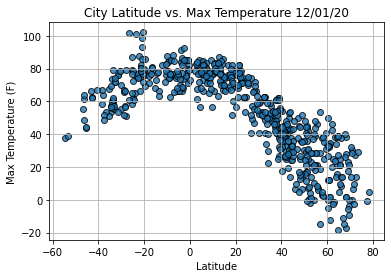

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()